# --- 1. Introduction/Overview ---

# --- 2. Setup/Imports ---

In [1]:
import sys
!{sys.executable} -m pip install statsmodels


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, kruskal

from IPython.display import display


--- 3. Data Loading ---

In [3]:
df = pd.read_excel(r'C:\Users\USER\Desktop\cancer patient data sets.xlsx')
df.drop(columns=["Patient Id"], inplace=True)
df['Level'] = df['Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

# --- 4. Exploratory Data Analysis (EDA) ---

In [4]:
print("Dataset size:", df.shape)
print("\\nData types:\\n")
display(df.dtypes)

Dataset size: (1000, 24)
\nData types:\n


Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int64
dtype: object

In [5]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [6]:
print("Last 5 rows of the dataset:")
display(df.tail())

Last 5 rows of the dataset:


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
999,47,1,6,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2


In [7]:
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

In [8]:
display(df.describe())

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


In [9]:
# Check for missing values 
print("\\nMissing value check (original df):\\n")
print(df.isnull().sum())

\nMissing value check (original df):\n
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


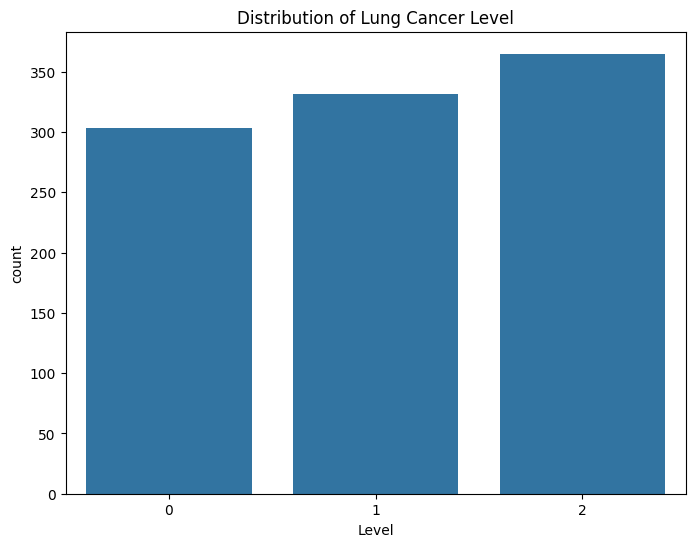

Level
2    0.365
1    0.332
0    0.303
Name: proportion, dtype: float64


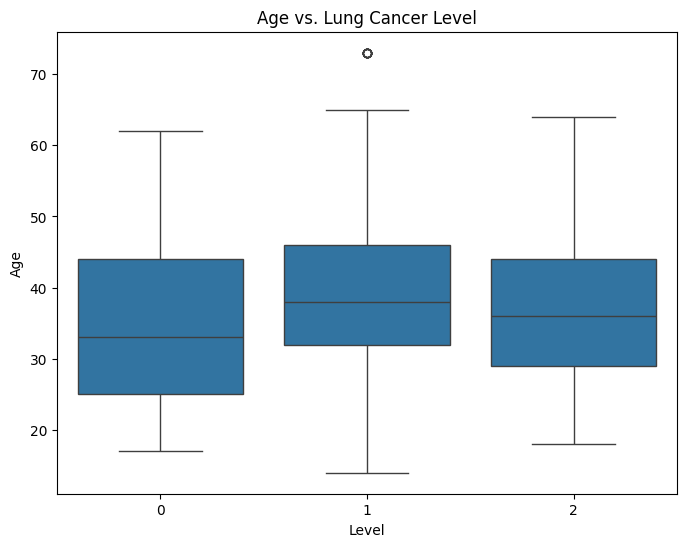

In [10]:
# Target Variable Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='Level', data=df)
plt.title('Distribution of Lung Cancer Level')
plt.show()
print(df['Level'].value_counts(normalize=True))

plt.figure(figsize=(8, 6))
sns.boxplot(x='Level', y='Age', data=df)
plt.title('Age vs. Lung Cancer Level')
plt.show()

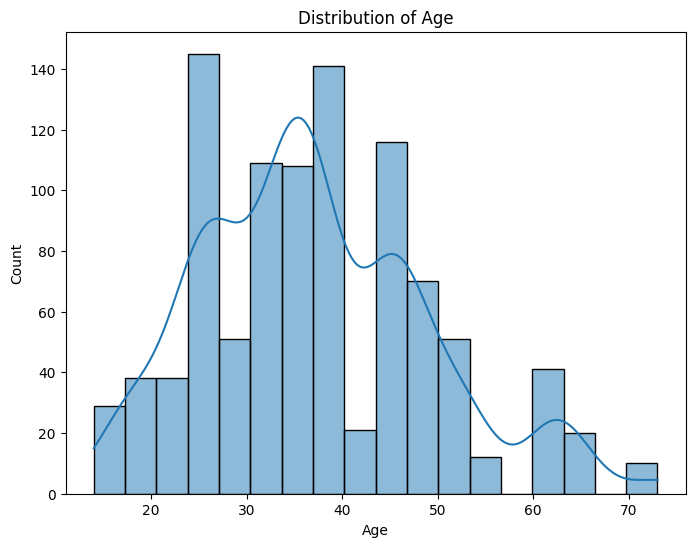

In [11]:
# Independent Variable Analysis OR Feature Analysis(?)
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

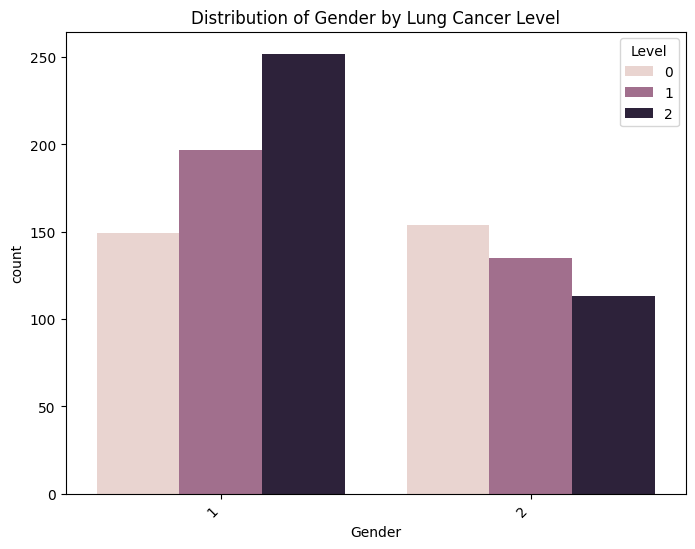

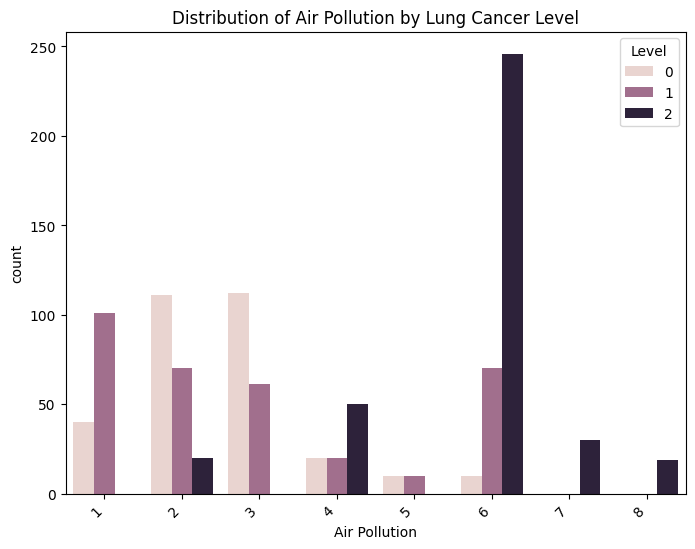

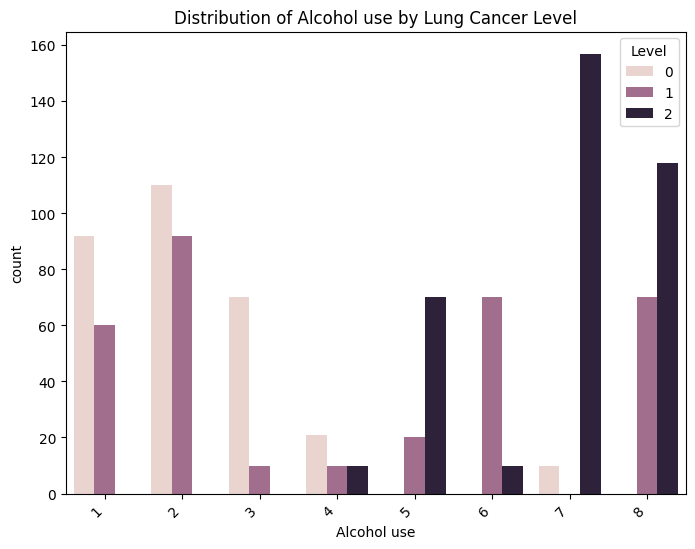

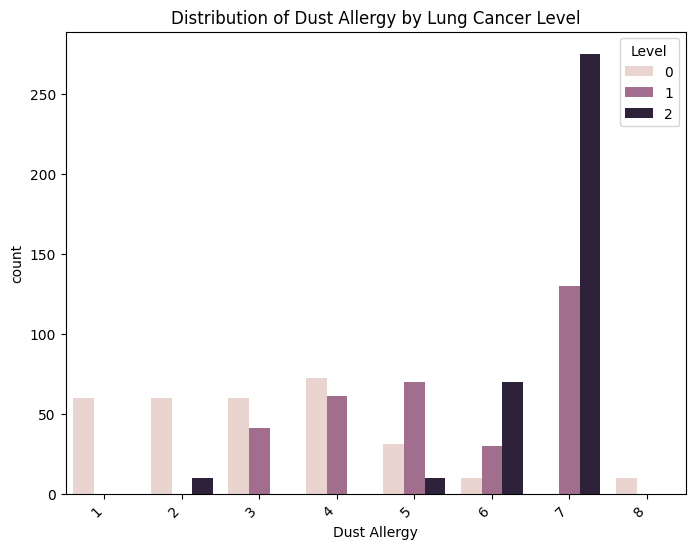

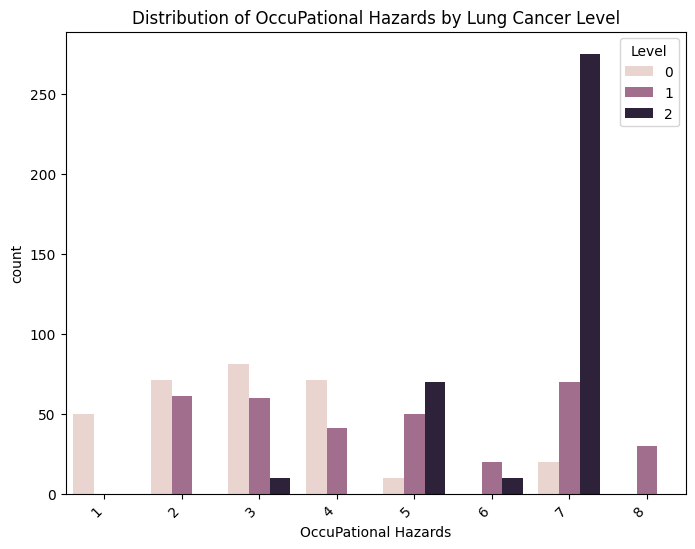

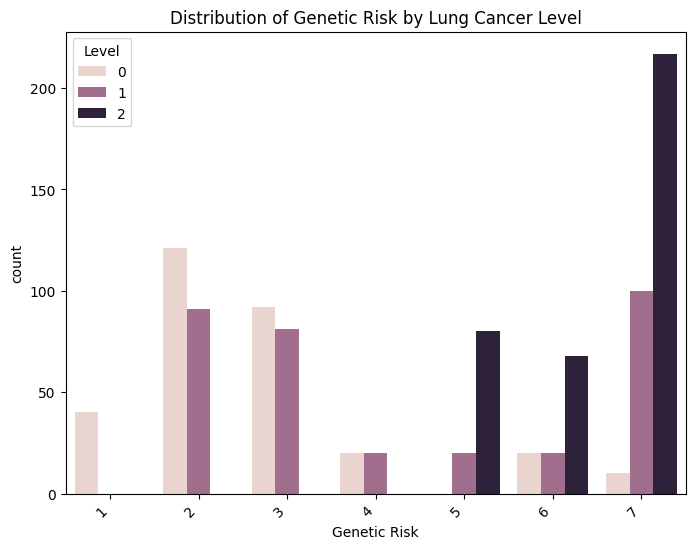

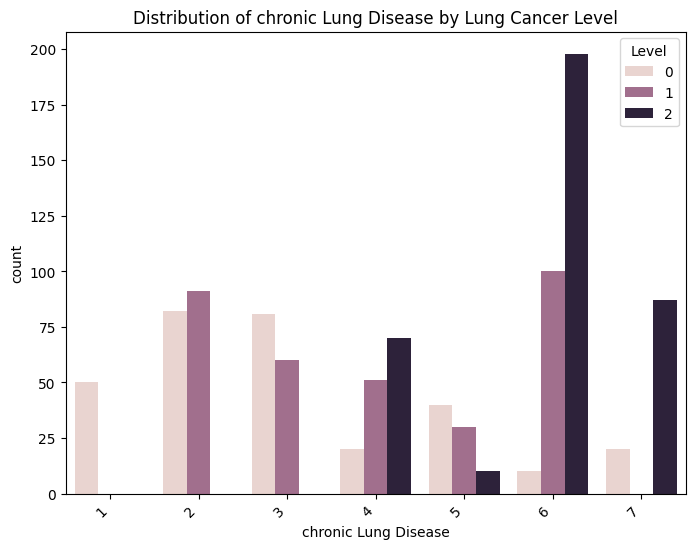

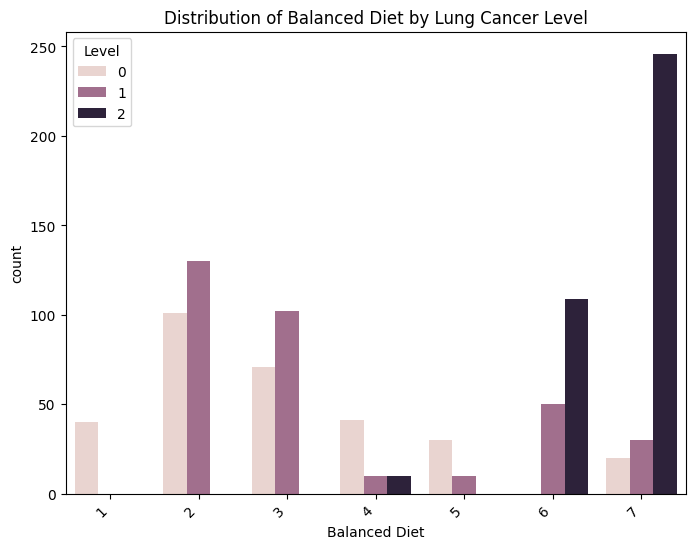

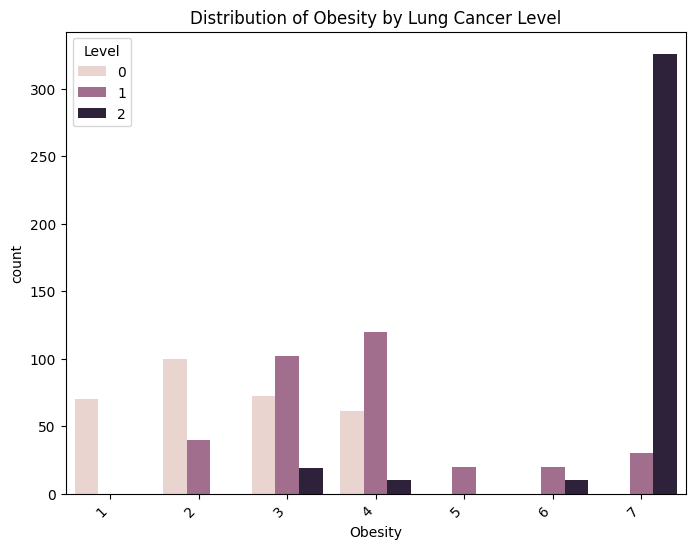

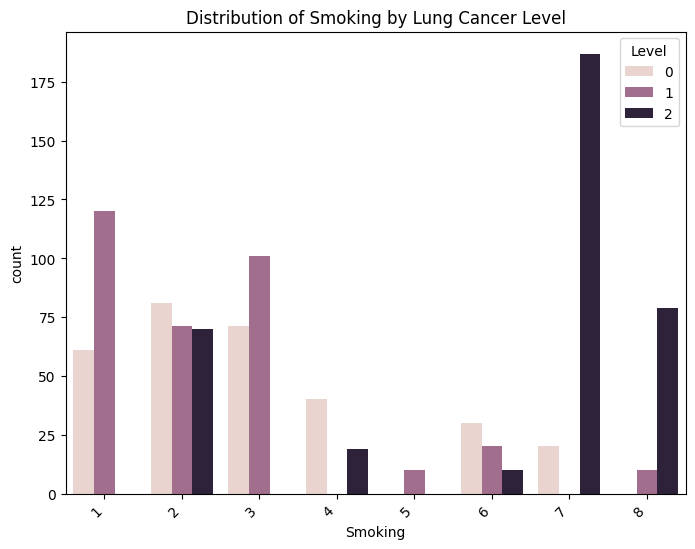

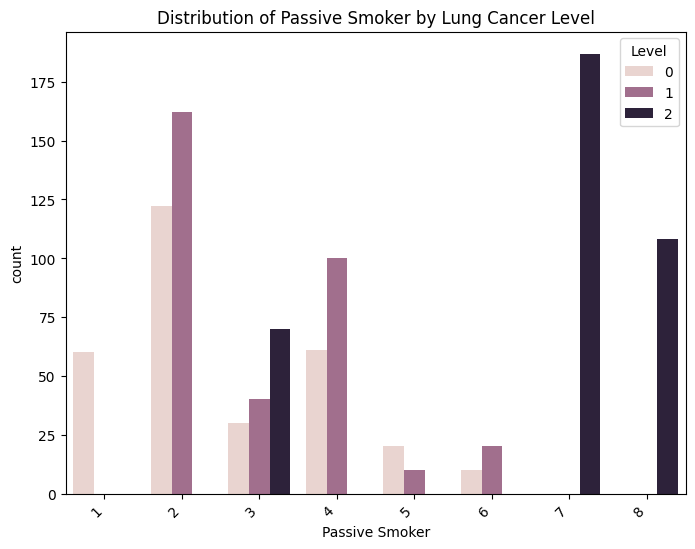

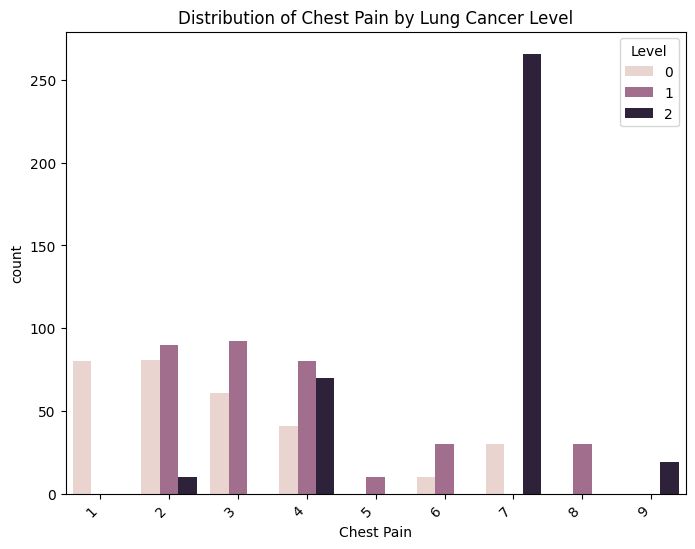

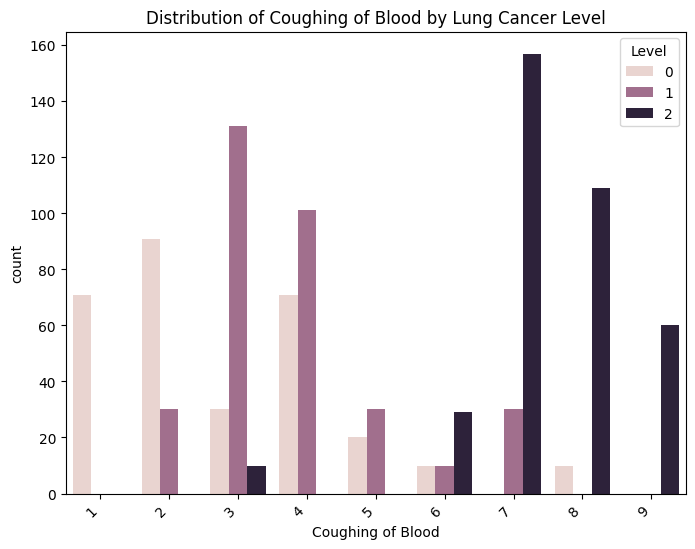

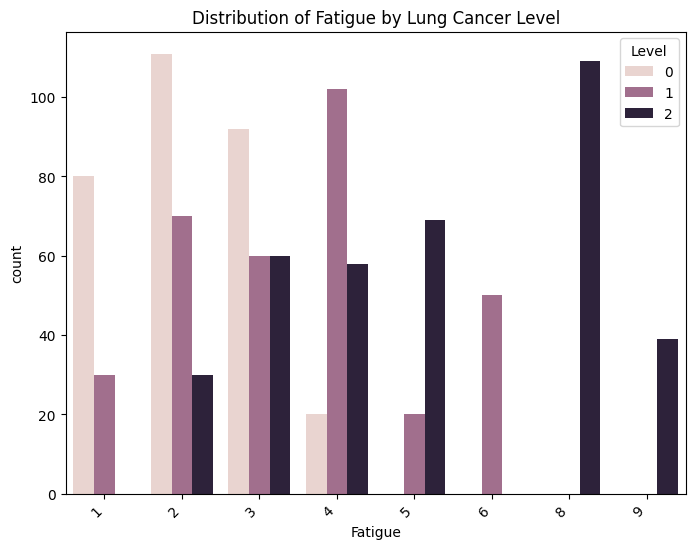

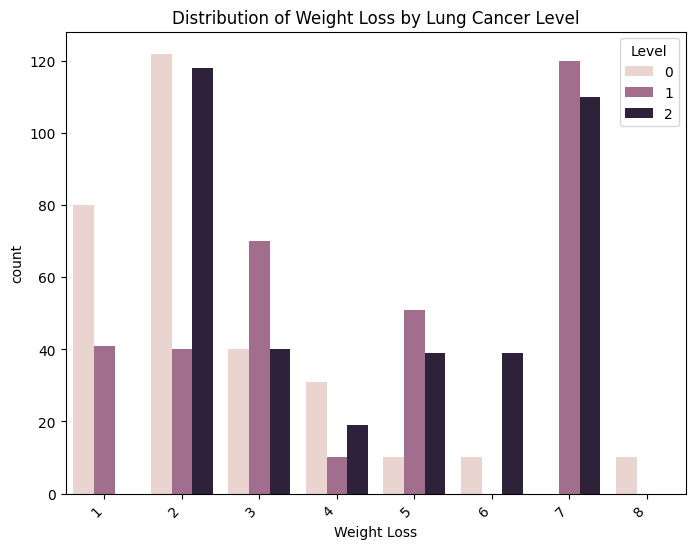

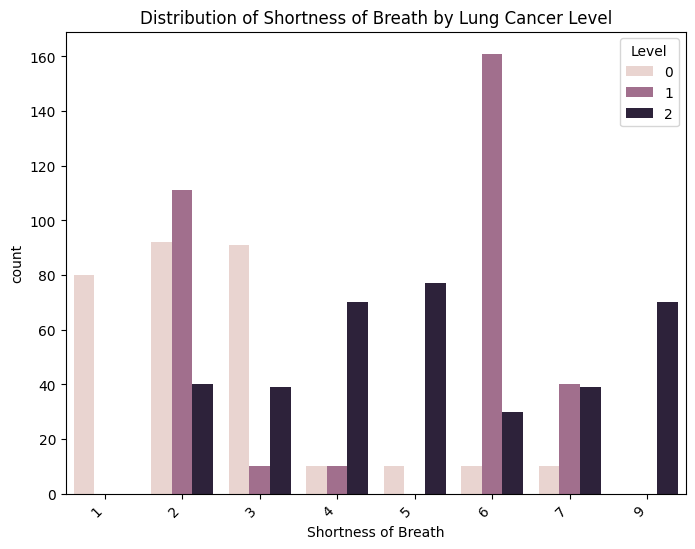

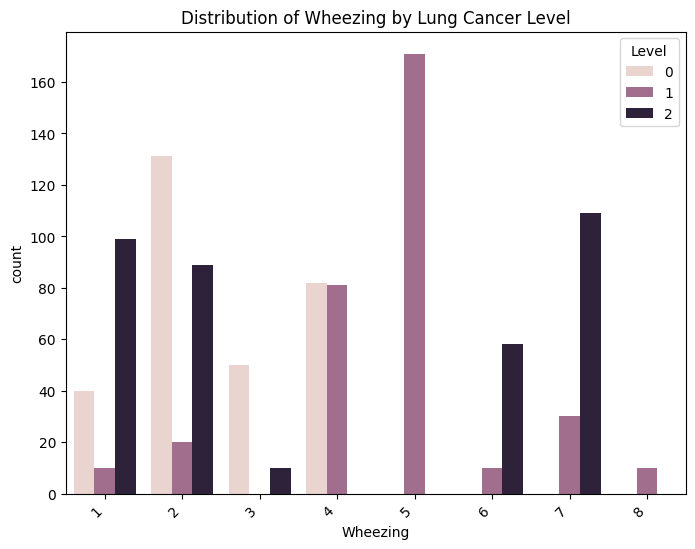

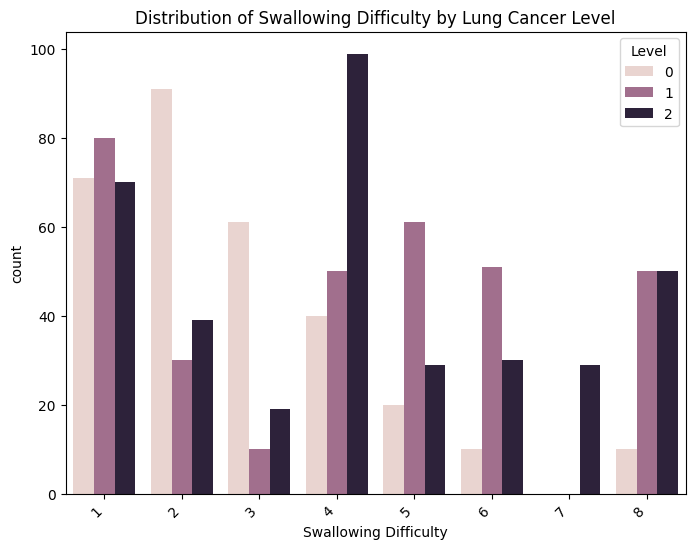

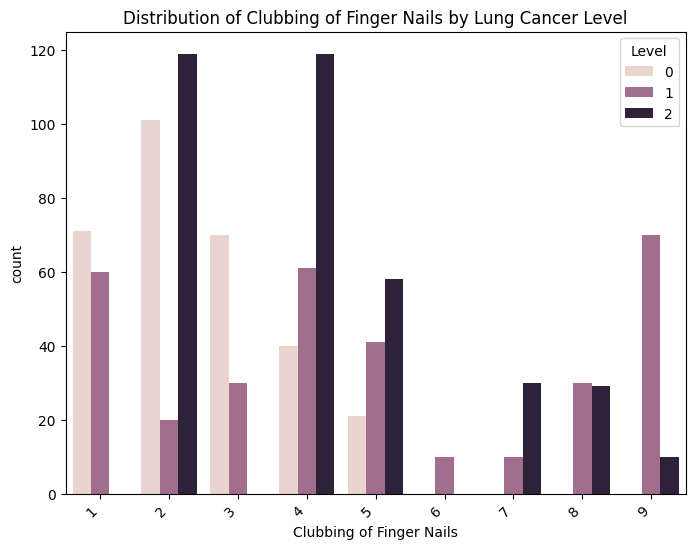

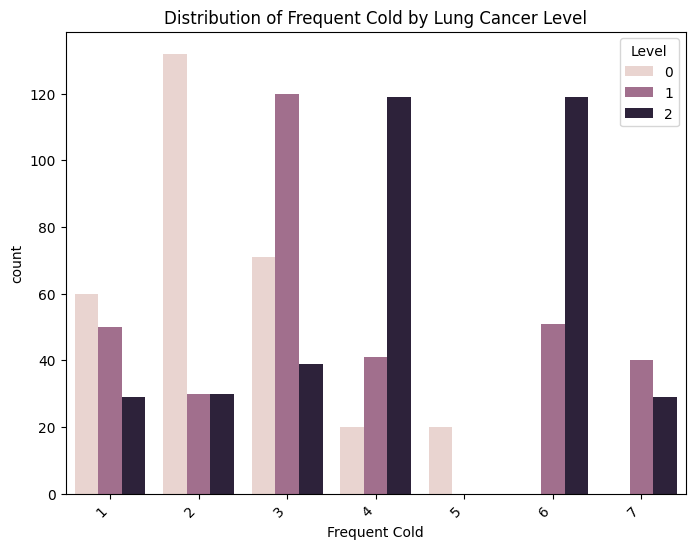

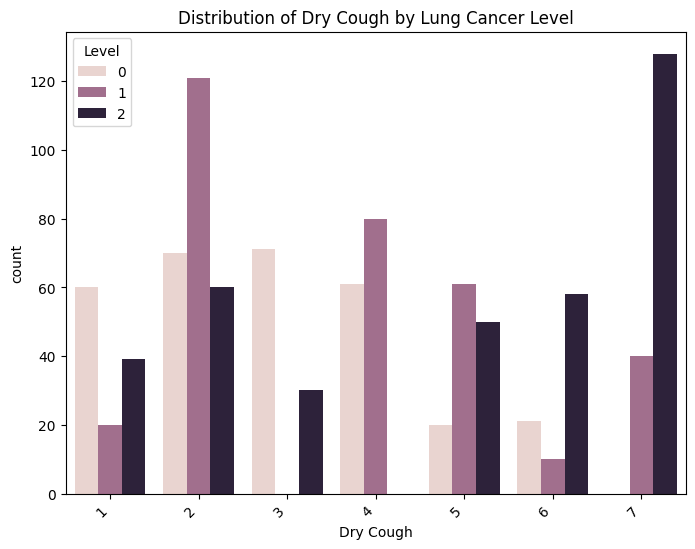

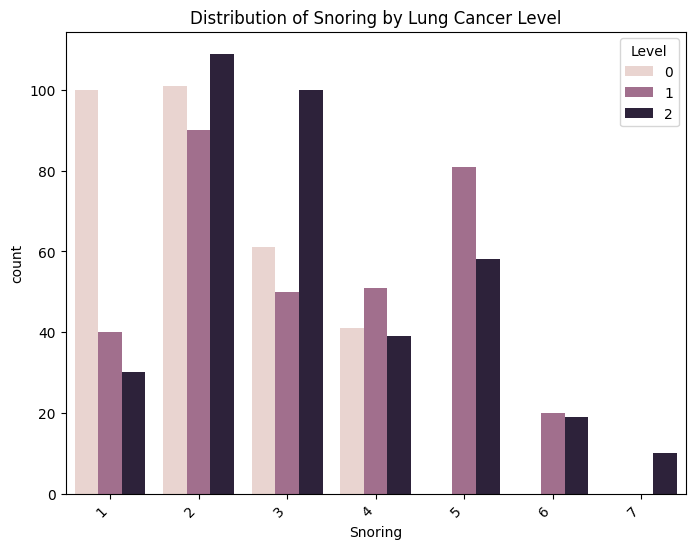

In [12]:
# Visualize relationships between categorical features and Level
categorical_cols = ['Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
                    'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
                    'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker',
                    'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss',
                    'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty',
                    'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Level', data=df)
    plt.title(f'Distribution of {col} by Lung Cancer Level')
    plt.xticks(rotation=45, ha='right')  
    plt.show()

Columns in df_num: Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


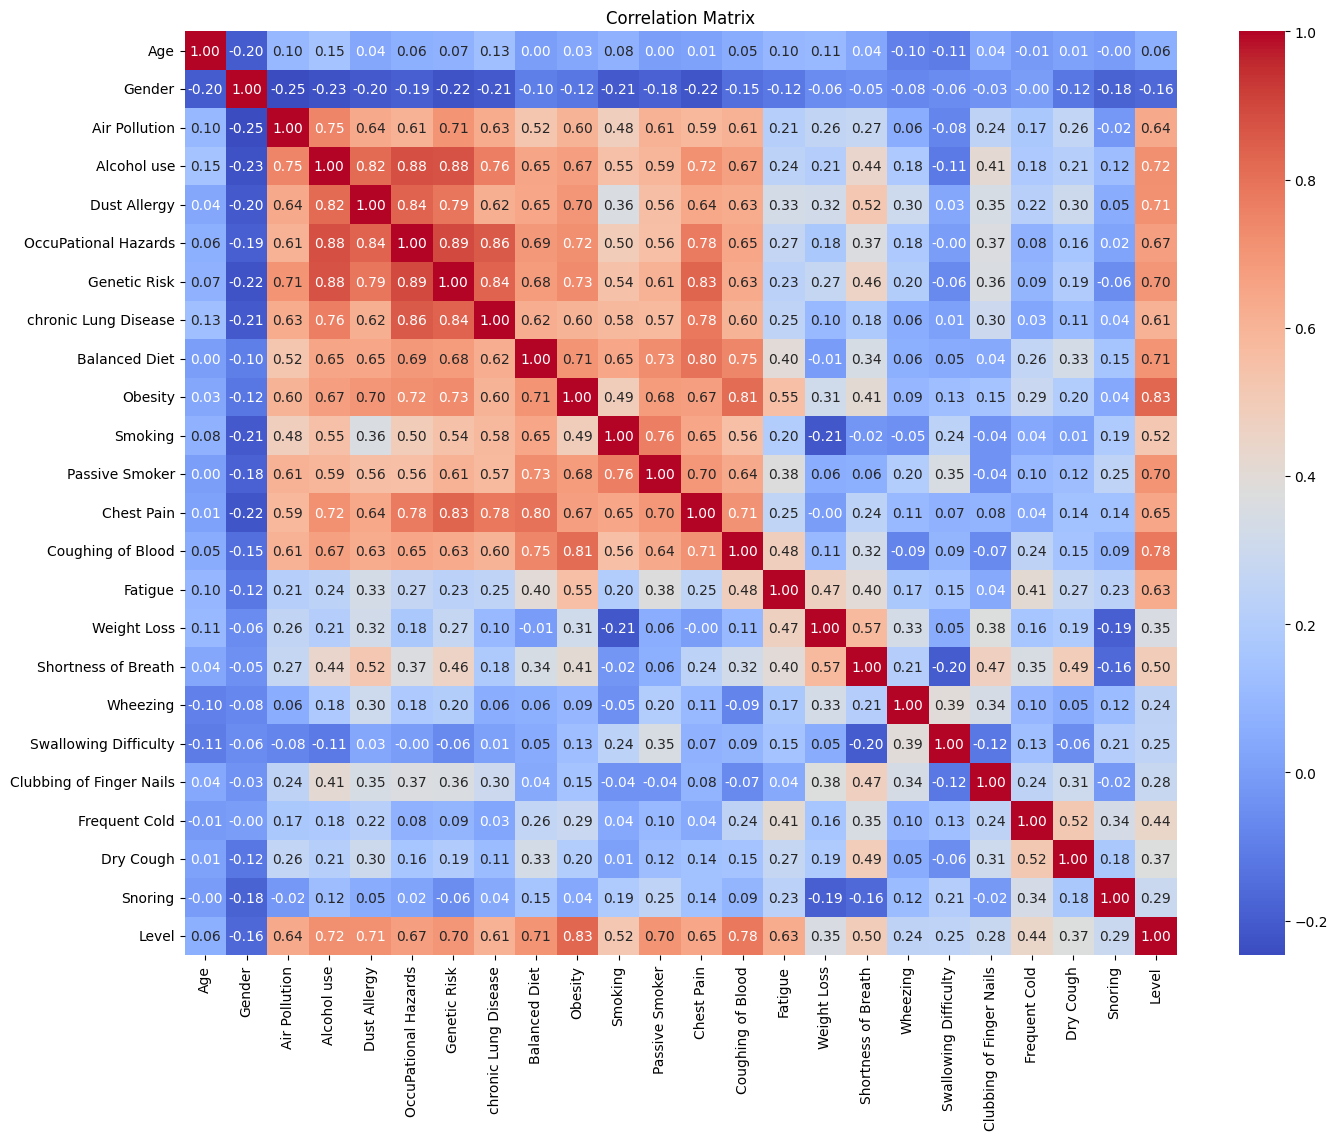

In [13]:
df_num = df.select_dtypes(include=['int64', 'float64'])
print("Columns in df_num:", df_num.columns)  
plt.figure(figsize=(16, 12))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [14]:
# 4.5. Variable Type Identification
import pandas as pd

def identify_variable_types(df):
    """
    Identifies variable types in a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        dict: A dictionary containing lists of categorical, numerical, and identifier columns.
    """

    categorical_cols = []
    numerical_cols = []
    identifier_cols = []

    for col in df.columns:
        # Check if the column is of object type (often used for strings)
        if df[col].dtype == 'object':
            # Check if the number of unique values is "small" 
            # (adjust the threshold as needed)
            if len(df[col].unique()) < 50:  # Example threshold
                categorical_cols.append(col)
            else:
                identifier_cols.append(col)  # Could be high cardinality text
        elif df[col].dtype in ['int64', 'float64']:
            # Check if it looks like an identifier (many unique values)
            if len(df[col].unique()) == len(df[col]):
                identifier_cols.append(col)
            else:
                numerical_cols.append(col)
    
    return {
        'categorical': categorical_cols,
        'numerical': numerical_cols,
        'identifier': identifier_cols
    }

variable_types = identify_variable_types(df)

print("Categorical Columns:", variable_types['categorical'])
print("Numerical Columns:", variable_types['numerical'])
print("Identifier Columns:", variable_types['identifier'])

Categorical Columns: []
Numerical Columns: ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']
Identifier Columns: []


# --- 5. Preprocessing ---

In [15]:
# Handle missing values in 'Level' (BEFORE the split!)
if df['Level'].isnull().sum() > 0:
    df['Level'].fillna(df['Level'].median(), inplace=True)
    print("\\nMissing values handled in 'Level'\\n")
else:
    print("\\nNo missing values in 'Level'\\n")

\nNo missing values in 'Level'\n


In [16]:
X = df.drop('Level', axis=1)
y = df["Level"]

In [17]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Train-test split (STRATIFIED)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
# Debug: Check lengths and missing values IMMEDIATELY after the split
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in y_test:", y_test.isnull().sum())
print("Missing values in X_train:", pd.DataFrame(X_train).isnull().sum().sum())
print("Missing values in X_test:", pd.DataFrame(X_test).isnull().sum().sum())

Length of y_train: 800
Length of y_test: 200
Missing values in y_train: 0
Missing values in y_test: 0
Missing values in X_train: 0
Missing values in X_test: 0


--- 6. Model Building and Evaluation ---

In [20]:
#Recheck to see which one I will use
# Normality Tests
print("\n--- Normality Tests (Shapiro-Wilk) ---")
for col in X.columns:
    stat, p = shapiro(X[col])
    print(f'Shapiro-Wilk Test for {col}: Statistics={stat:.3f}, p-value={p:.3f}')
    if p < 0.05:
        print(f' -> Feature {col} is likely not normally distributed')


--- Normality Tests (Shapiro-Wilk) ---
Shapiro-Wilk Test for Age: Statistics=0.970, p-value=0.000
 -> Feature Age is likely not normally distributed
Shapiro-Wilk Test for Gender: Statistics=0.622, p-value=0.000
 -> Feature Gender is likely not normally distributed
Shapiro-Wilk Test for Air Pollution: Statistics=0.878, p-value=0.000
 -> Feature Air Pollution is likely not normally distributed
Shapiro-Wilk Test for Alcohol use: Statistics=0.864, p-value=0.000
 -> Feature Alcohol use is likely not normally distributed
Shapiro-Wilk Test for Dust Allergy: Statistics=0.850, p-value=0.000
 -> Feature Dust Allergy is likely not normally distributed
Shapiro-Wilk Test for OccuPational Hazards: Statistics=0.875, p-value=0.000
 -> Feature OccuPational Hazards is likely not normally distributed
Shapiro-Wilk Test for Genetic Risk: Statistics=0.840, p-value=0.000
 -> Feature Genetic Risk is likely not normally distributed
Shapiro-Wilk Test for chronic Lung Disease: Statistics=0.897, p-value=0.000
 -

In [21]:
from scipy.stats import kruskal

# Assuming 'df' is your DataFrame and 'Level' is the target variable (0 = Low, 1 = Medium, 2 = High)
features = [
    'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
    'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet',
    'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood',
    'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing',
    'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
    'Dry Cough', 'Snoring'
]

print("Kruskal-Wallis H-test results (grouped by Lung Cancer Level):\n")
for feature in features:
    try:
        groups = [df[df['Level'] == lvl][feature] for lvl in df['Level'].unique()]
        stat, p = kruskal(*groups)
        print(f"{feature:<25} | H = {stat:.3f}, p = {p:.4f} | {'Significant ✅' if p < 0.05 else 'Not Significant ❌'}")
    except Exception as e:
        print(f"{feature:<25} | Error: {e}")

Kruskal-Wallis H-test results (grouped by Lung Cancer Level):

Age                       | H = 14.897, p = 0.0006 | Significant ✅
Gender                    | H = 27.198, p = 0.0000 | Significant ✅
Air Pollution             | H = 463.143, p = 0.0000 | Significant ✅
Alcohol use               | H = 466.487, p = 0.0000 | Significant ✅
Dust Allergy              | H = 505.900, p = 0.0000 | Significant ✅
OccuPational Hazards      | H = 436.577, p = 0.0000 | Significant ✅
Genetic Risk              | H = 456.461, p = 0.0000 | Significant ✅
chronic Lung Disease      | H = 392.778, p = 0.0000 | Significant ✅
Balanced Diet             | H = 549.663, p = 0.0000 | Significant ✅
Obesity                   | H = 671.653, p = 0.0000 | Significant ✅
Smoking                   | H = 376.985, p = 0.0000 | Significant ✅
Passive Smoker            | H = 526.106, p = 0.0000 | Significant ✅
Chest Pain                | H = 446.410, p = 0.0000 | Significant ✅
Coughing of Blood         | H = 628.213, p = 0.0000 | S

In [22]:
##Recheck to see which one I will use
# Feature Relationships and Collinearity
print("\n--- Feature Relationships and Collinearity (Statsmodels OLS) ---")
X_train_sm = sm.add_constant(X_train)  # Add constant for intercept
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())



--- Feature Relationships and Collinearity (Statsmodels OLS) ---
                            OLS Regression Results                            
Dep. Variable:                  Level   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     443.8
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        12:38:38   Log-Likelihood:                 88.851
No. Observations:                 800   AIC:                            -129.7
Df Residuals:                     776   BIC:                            -17.27
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [23]:
#Recheck to see which one I will use
# VIF Calculation
#This code calculates the Variance Inflation Factor (VIF) for each feature. High VIF values (typically > 5 or 10) suggest multicollinearity.
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF):\n", vif_data)


Variance Inflation Factors (VIF):
                      Feature         VIF
0                        Age    8.878553
1                     Gender    7.229196
2              Air Pollution   18.730416
3                Alcohol use   53.488354
4               Dust Allergy   50.521043
5       OccuPational Hazards  124.714056
6               Genetic Risk  112.607021
7       chronic Lung Disease   58.049623
8              Balanced Diet   38.343194
9                    Obesity   42.431869
10                   Smoking   16.088311
11            Passive Smoker   33.806212
12                Chest Pain   39.990682
13         Coughing of Blood   38.681090
14                   Fatigue   14.379270
15               Weight Loss   15.035395
16       Shortness of Breath   20.944738
17                  Wheezing   10.630942
18     Swallowing Difficulty   11.949525
19  Clubbing of Finger Nails   10.794104
20             Frequent Cold   11.774023
21                 Dry Cough   10.309063
22                   

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Value counts of the target variable
print("\nLevel Value Counts:\n", df['Level'].value_counts())


Level Value Counts:
 Level
2    365
1    332
0    303
Name: count, dtype: int64


In [25]:
# Model 1: Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression RMSE: {rmse_lr:.2f}, R-squared: {r2_lr:.2f}")
print("Linear Regression Coefficients:", model_lr.coef_)

Linear Regression RMSE: 0.24, R-squared: 0.92
Linear Regression Coefficients: [ 0.02733367  0.04878933  0.12229886 -0.07224208 -0.02350479 -0.09722637
  0.41177507 -0.02360779  0.06703943  0.10410841 -0.04295722  0.06680131
 -0.20477212  0.31628888  0.14458606 -0.03937011  0.10370576 -0.00045941
  0.17009532  0.13768456 -0.00843414  0.01621636  0.20159471]


In [26]:
model_ridge = Ridge(alpha=1.0)  # Adjust alpha (regularization strength)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression RMSE: {rmse_ridge:.2f}, R-squared: {r2_ridge:.2f}")

Ridge Regression RMSE: 0.24, R-squared: 0.92


In [27]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression RMSE: {rmse_poly:.2f}, R-squared: {r2_poly:.2f}")

Polynomial Regression RMSE: 0.00, R-squared: 1.00


In [28]:
# Cross-Validation (Example - using Ridge if it performed best)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_ridge, X_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
print("Cross-Validation RMSE Scores:", -cv_scores)
print("Mean CV RMSE:", -cv_scores.mean())
print("Std CV RMSE:", cv_scores.std())

Cross-Validation RMSE Scores: [0.21754487 0.27638707 0.20904601 0.20622087 0.23471088]
Mean CV RMSE: 0.2287819396878862
Std CV RMSE: 0.025792174646015426


In [29]:
def predict_lung_cancer_level(patient_data, model, scaler):
    """
    Predicts the lung cancer level for a single patient.

    Args:
        patient_data (dict or pd.Series): Patient's risk factor data.
        model: The trained machine learning model.
        scaler: The StandardScaler used for training data.

    Returns:
        str: Predicted lung cancer level (e.g., "Low", "Medium", "High").
    """

    
    if isinstance(patient_data, dict):
        patient_df = pd.DataFrame([patient_data])
    else:
        patient_df = pd.DataFrame(patient_data).T.reset_index().T.set_axis([0], axis=0, inplace=False)

   
    patient_scaled = scaler.transform(patient_df)

    
    prediction = model.predict(patient_scaled)

    
    level_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}  
    predicted_level = level_mapping[int(prediction[0])]

    return predicted_level
# Example patient data
new_patient = {
    'Age': 60,
    'Gender': 1,  
    'Air Pollution': 4,
    'Alcohol use': 6,
    'Dust Allergy': 7,
    'OccuPational Hazards': 8,
    'Genetic Risk': 7,
    'chronic Lung Disease': 9,
    'Balanced Diet': 2,
    'Obesity': 4,
    'Smoking': 8,
    'Passive Smoker': 4,
    'Chest Pain': 8,
    'Coughing of Blood': 9,
    'Fatigue': 7,
    'Weight Loss': 6,
    'Shortness of Breath': 7,
    'Wheezing': 5,
    'Swallowing Difficulty': 6,
    'Clubbing of Finger Nails': 8,
    'Frequent Cold': 7,
    'Dry Cough': 6,
    'Snoring': 5
}

level_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}  
# Make the prediction
predicted_level = predict_lung_cancer_level(new_patient, model_ridge, scaler)
print("Predicted Lung Cancer Level:", predicted_level)

    
   

new_patient_2 = {
    'Age': 25,
    'Gender': 2,
    'Air Pollution': 2,
    'Alcohol use': 1,
    'Dust Allergy': 3,
    'OccuPational Hazards': 2,
    'Genetic Risk': 2,
    'chronic Lung Disease': 1,
    'Balanced Diet': 8,
    'Obesity': 2,
    'Smoking': 1,
    'Passive Smoker': 1,
    'Chest Pain': 2,
    'Coughing of Blood': 1,
    'Fatigue': 2,
    'Weight Loss': 2,
    'Shortness of Breath': 2,
    'Wheezing': 1,
    'Swallowing Difficulty': 1,
    'Clubbing of Finger Nails': 1,
    'Frequent Cold': 2,
    'Dry Cough': 1,
    'Snoring': 3
}

predicted_level_2 = predict_lung_cancer_level(new_patient_2, model_ridge, scaler)
print("Predicted Level for Patient 2:", predicted_level_2)

Predicted Lung Cancer Level: High
Predicted Level for Patient 2: Low


--- 7. Prediction Function ---

In [30]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe to avoid modifying the original directly
df_encoded = df.copy()

# Instantiate label encoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Confirm changes
df_encoded.head()


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,0,1,3,4,3,2,1,1,3,...,2,3,1,1,2,0,1,2,3,0
1,17,0,2,0,4,2,3,1,1,1,...,0,2,6,7,5,1,0,6,1,1
2,35,0,3,4,5,4,4,3,5,6,...,6,6,7,1,0,3,5,6,1,2
3,37,0,6,6,6,6,5,6,6,6,...,3,1,2,0,3,4,5,6,4,2
4,46,0,5,7,6,6,6,5,6,6,...,2,1,3,0,3,1,3,1,2,2


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split into features and target
X = df_encoded.drop('Level', axis=1)
y = df_encoded['Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



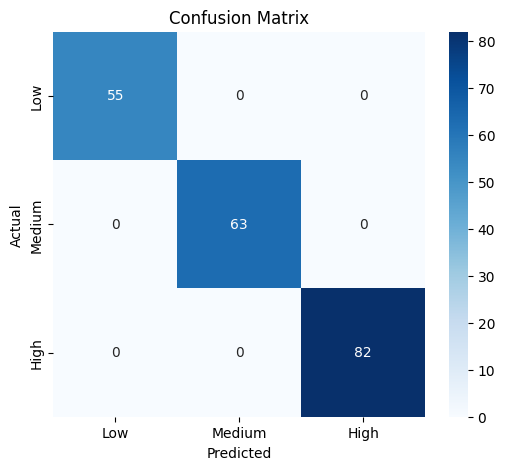

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Low', 'Medium', 'High']

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


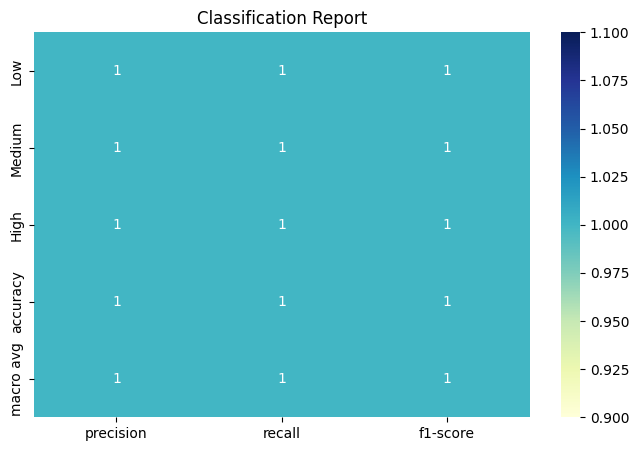

In [33]:
from sklearn.metrics import classification_report
import pandas as pd

# Create a DataFrame from the classification report
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title("Classification Report")
plt.show()
